In [1]:
import pandas #ipython notebook
titanic = pandas.read_csv("titanic_train.csv")
titanic.head(5)
#print (titanic.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
print (titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
print (titanic["Sex"].unique())

# Replace all the occurences of male with the number 0.
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1


['male' 'female']


In [4]:
print (titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [5]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.model_selection import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(titanic.shape[0],n_splits=3, random_state=1)

predictions = []
for i,(train, test) in enumerate(kf.split(titanic)):
    # print('train:')
    # print(train)
    # print('test:')
    # print(test)
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = titanic["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

TypeError: __init__() got multiple values for argument 'n_splits'

In [ ]:
import numpy as np

# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print (accuracy)

In [ ]:
# from sklearn import cross_validation
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

In [6]:
titanic_test = pandas.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [7]:
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
# kf = KFold(titanic.shape[0],n_splits=3, random_state=1)
kf = model_selection.KFold(titanic.shape[0], n_splits=3, random_state=1)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'model_selection' is not defined

In [8]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
kf = model_selection.KFold(titanic.shape[0], n_splits=3, random_state=1)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

NameError: name 'model_selection' is not defined

In [9]:
# Generating a familysize column
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]


# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [10]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print('1'*100)
print(titles)
print('2'*100)
print(pandas.value_counts(titles))
print('3'*100)
print(titles)
print('4'*100)
# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Sir           1
Countess      1
Mme           1
Lady          1
Jonkheer      1
Don           1
Capt          1
Name: Name, dtype: int64
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
0      1
1      3
2      2
3      3
4      1
5      1
6      1
7      4
8      3
9      3
10     2
11     2
12     1
13     1
14     2
15     3
16     4
17     1
18     3
19     3
20     1
21     1
22     2
23     1
24     2
25     3
26     1
27     1
28     2
29     1
      ..
861    1
862    3
863    2
864    1
865    3
866    2
867    1
868    1
869    4
870    1
871    3
872    1
873    1
874    3
875    2
876    1
877    1
878    1
879    3
880    3
881    1
882    2
883    1
884    1
885    3
886    6
887    2
888    2
889    1
890    1
Name: Name, Length: 891, dtype: object
22222222222222

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


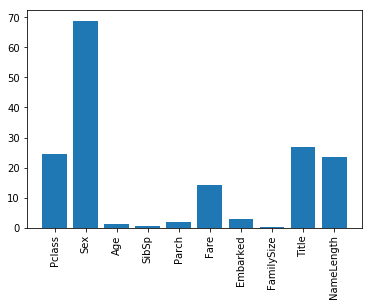

In [11]:
# 验证那些特征比较重要 
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",'FamilySize','Title','NameLength']
#Perform feature selection
selector=SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])
scores=-np.log10(selector.pvalues_)
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
algorithms=[
    [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3), ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",'FamilySize','Title','NameLength']],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
]
kf=KFold(titanic.shape[0],n_splits=3,random_state=1)
predictors=[]
for i,(train,test) in enumerate(kf.split(titanic)):
    train_target=titanic['Survived'].iloc[train]
    full_test_predictions=[]
    # Make predictions for each algorithm on each fold
    for alg,predictors in algorithms:
        #Fix the algorithm on the training data 
        alg.fit(titanic[predictors].iloc[train,:],train_target)
        # Select and predict on the test fold 
        # The astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error 
        test_predictions=alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions=(full_test_predictions[0]+full_test_predictions[1])/2
    test_predictions[test_predictions<=0.5]=0
    test_predictions[test_predictions>0.5]=1
    predictions.append(test_predictions)
# 计算出平局的结果 
# Put all the predictions together into one array
predictions=np.concatenate(predictions,axis=0)
accuracy=sum(predictions[predictions==titanic['Survived']])/len(predictions)
print(accuracy)


    
    


NameError: name 'LogisticRegression' is not defined